In [2]:
from preamble import *

2025-01-28 13:30:27,080 - WARNING - File .dacerc not found. You are requesting data in public mode. To change this behaviour, create a .dacerc file in your home directory and fill it with your API key. More infos on https://dace.unige.ch


  0%|          | 0/2 [00:00<?, ?it/s]

# Read Data
## Save as Rainbows

In [4]:
G102_extracted_spec = '/Users/wiwa8630/Desktop/Projects/AUMic_15836/PACMAN/G102/run_2024-10-19_12-00-36_AUMic_G102/extracted_lc/2024-10-19_12-05-03/lc_spec.txt'
G141_extracted_spec = '/Users/wiwa8630/Desktop/Projects/AUMic_15836/PACMAN/G141/run_2024-10-19_12-11-10_AUMic_G141/extracted_lc/2024-10-19_12-30-32/lc_spec.txt'

In [5]:
# Open the .txt file using astropy's Table.read
F21_table = Table.read(G141_extracted_spec, format='ascii')
S22_table = Table.read(G102_extracted_spec, format='ascii')

# Split the dataset based on scan value
F21_forward_scan = F21_table[F21_table['scan'] == 0.0]
F21_reverse_scan = F21_table[F21_table['scan'] == 1.0]
S22_forward_scan = S22_table[S22_table['scan'] == 0.0]
S22_reverse_scan = S22_table[S22_table['scan'] == 1.0]

  0%|          | 0/162 [00:00<?, ?it/s]

Successfully saved Rainbow object for F21 Forward


  0%|          | 0/162 [00:00<?, ?it/s]

Successfully saved Rainbow object for F21 Reverse


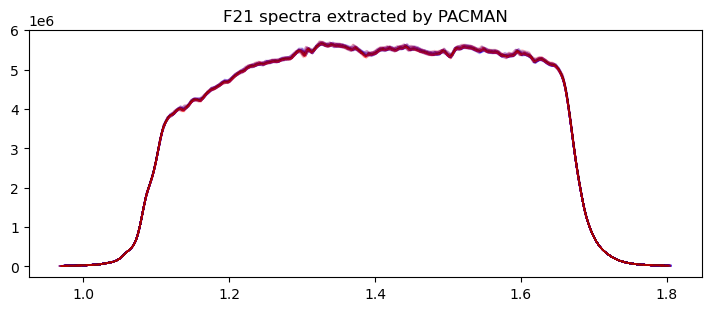

  0%|          | 0/160 [00:00<?, ?it/s]

Successfully saved Rainbow object for S22 Forward


  0%|          | 0/160 [00:00<?, ?it/s]

Successfully saved Rainbow object for S22 Reverse


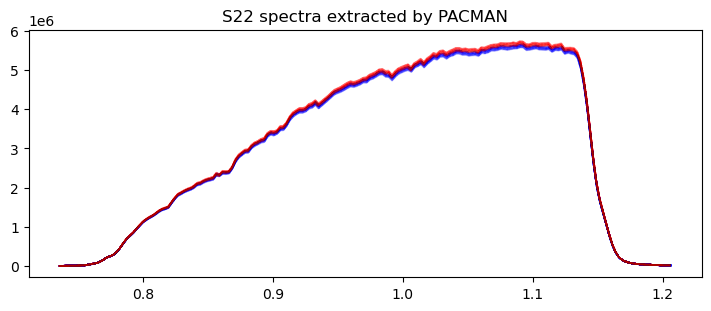

In [6]:
for visit in ['F21','S22']:

    plt.figure(figsize=(7,3))
    
    for direction in ['Forward','Reverse']:
        
        if visit=='F21':
            if direction =='Forward':
                table = F21_forward_scan
            if direction =='Reverse':        
                table = F21_reverse_scan
        
        if visit=='S22':
            if direction =='Forward':
                table = S22_forward_scan
            if direction =='Reverse':  
                table = S22_reverse_scan
                
        wavelength = table['template_waves'].data/1e4 * u.micron  # Wavelength
        flux = table['spec_opt'].data * u.electron      # Spectrum
        var = table['var_opt'].data     # Variance
        err = np.sqrt(var) * u.electron
        bjd_times = table['t_bjd'].data * u.day       # Times converted from MJD
        
        unique_times = np.unique(bjd_times)
        unique_wavelengths = np.unique(wavelength)
        
        flux_list = [None]*len(unique_times)
        err_list = [None]*len(unique_times)
        wave_list = [None]*len(unique_times)
        
        i = 0
        for t_i in unique_times:
            
            this_times_wavelengths = wavelength[bjd_times == t_i]
            this_times_fluxes = flux[bjd_times == t_i]
            this_times_errors = err[bjd_times == t_i]
            
            wave_list[i] = this_times_wavelengths
            flux_list[i] = this_times_fluxes
            err_list[i] = this_times_errors

            if direction =='Forward':
                col = 'blue'
            if direction =='Reverse':
                col = 'red'
                
            plt.errorbar(this_times_wavelengths, this_times_fluxes, yerr=this_times_errors, alpha=0.01,color=col)
            i += 1

        stacked_flux = np.stack(flux_list, axis = 1)
        stacked_err = np.stack(err_list, axis = 1)
        stacked_wave = np.stack(wave_list, axis = 1)
        
        pacman_rainbow = Rainbow(wavelength = np.nanmedian(stacked_wave, axis=1),
                          time = unique_times,
                          flux = stacked_flux,
                          uncertainty = stacked_err)
        # Save the unaltered extracted spec
        pacman_rainbow.save(f'../data/{visit}_{direction}_unaltered_pacman_spec.rainbow.npy')

        # In the event that the wavelength arrays are not identical, this will correct that
        pacman_rainbow.fluxlike["wavelength_2d"] = stacked_wave
        aligned = pacman_rainbow.align_wavelengths()      
        aligned.save(f'../data/{visit}_{direction}_aligned_pacman_spec.rainbow.npy')
        print(f'Successfully saved Rainbow object for {visit} {direction}')
        
    plt.title(f'{visit} spectra extracted by PACMAN')
    plt.savefig(f'../figs/{visit}_{direction}_pacman_spectra.png',dpi=600)
    plt.show()

# Examine the spectroscopic light curves we just saved with Chromatic

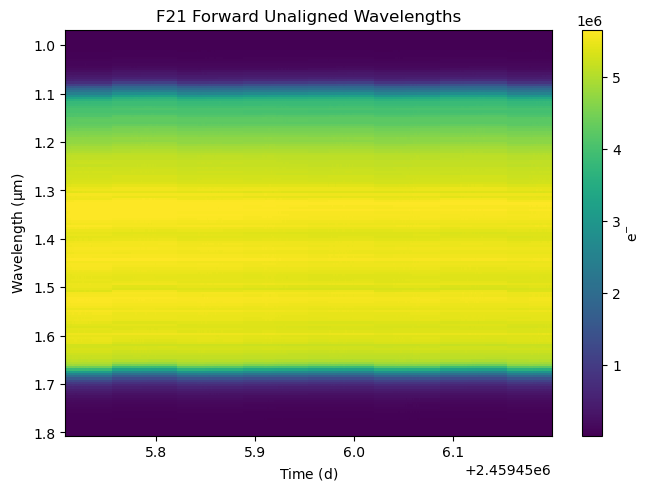

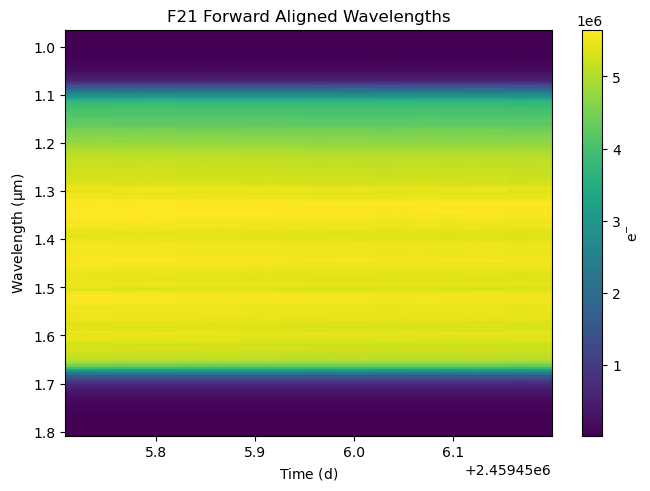

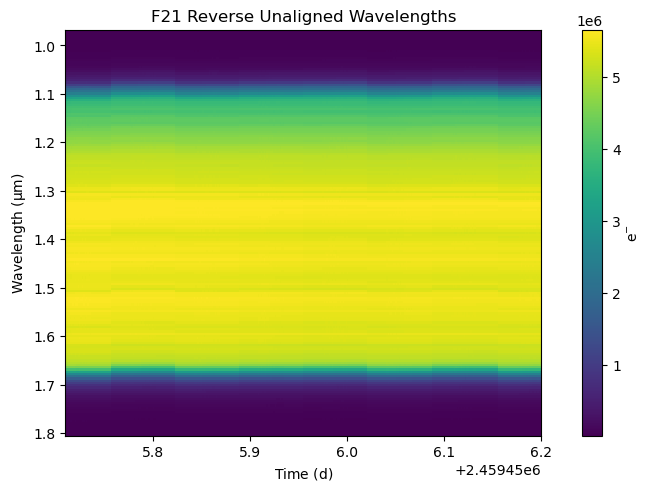

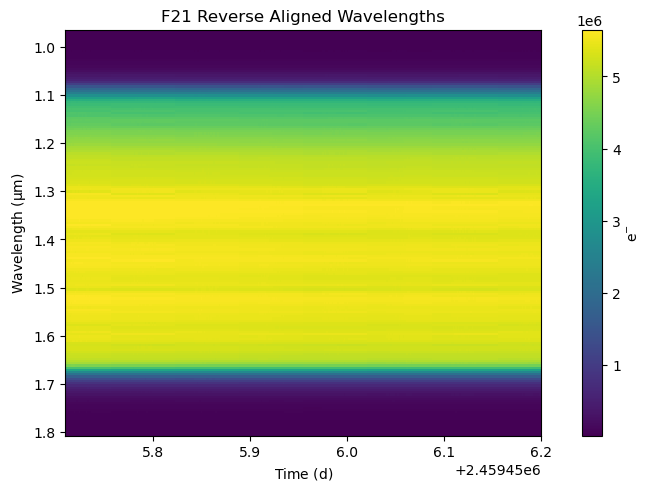

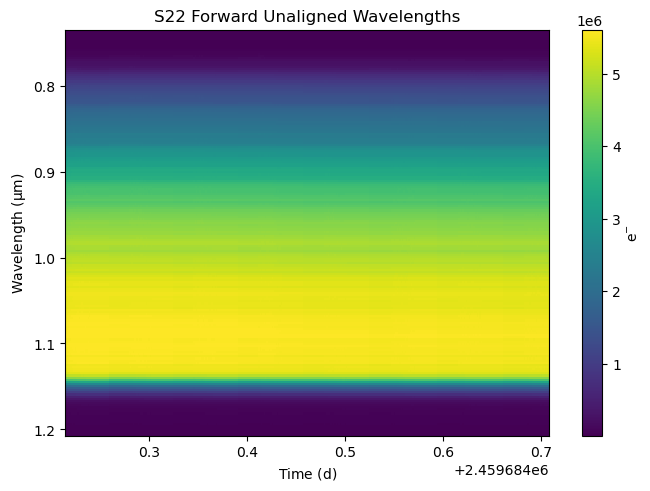

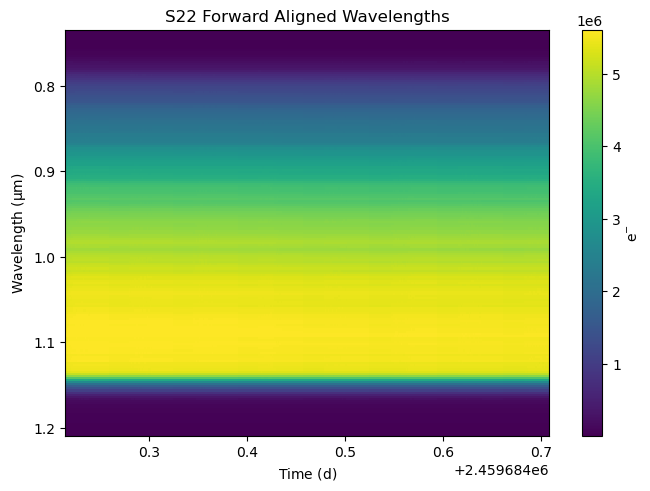

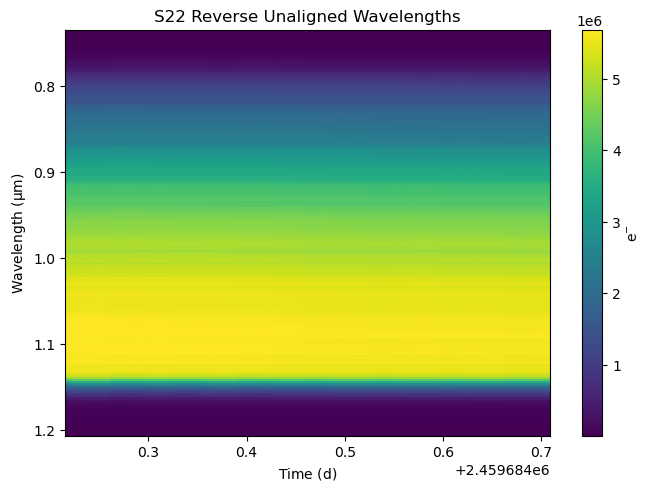

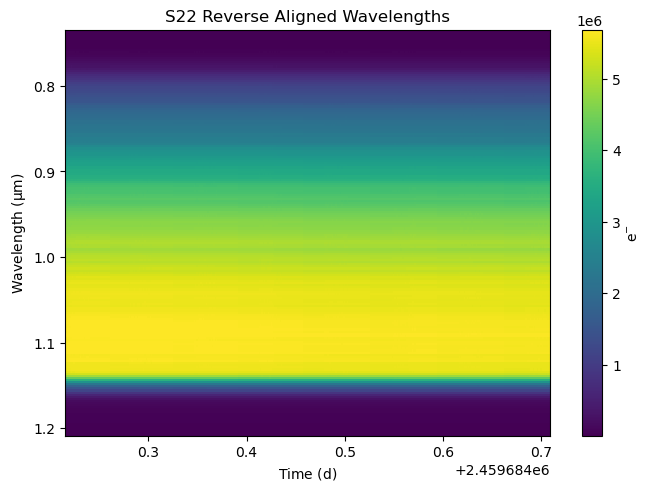

<Figure size 640x480 with 0 Axes>

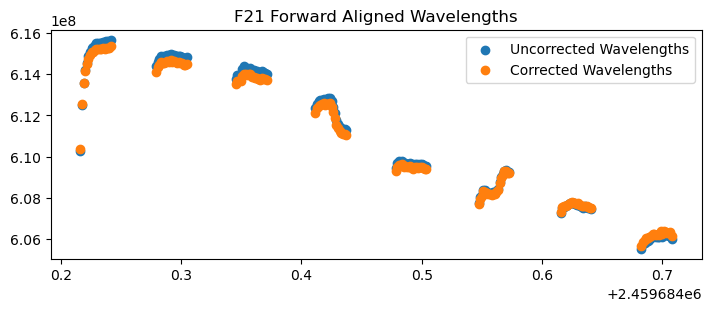

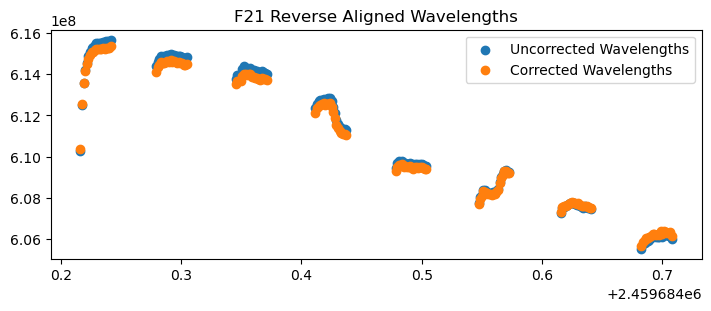

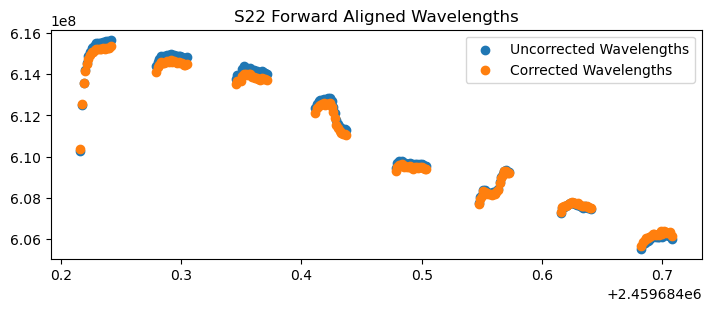

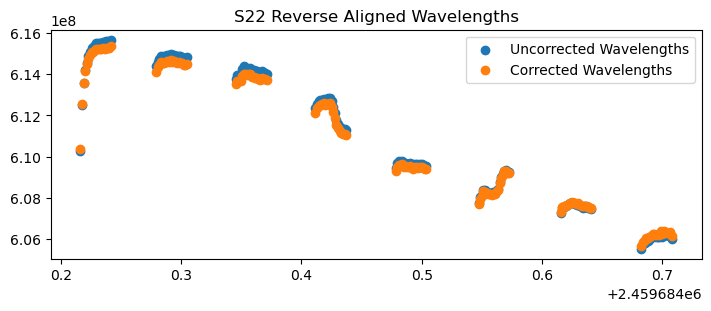

In [13]:
for visit in ['F21','S22']:
    
    for direction in ['Forward','Reverse']:
                
        unaltered_rainbow = read_rainbow(f'../data/{visit}_{direction}_unaltered_pacman_spec.rainbow.npy')
        unaltered_rainbow.imshow()
        plt.title(f'{visit} {direction} Unaligned Wavelengths')
        plt.show()
        plt.clf()

        aligned_rainbow = read_rainbow(f'../data/{visit}_{direction}_aligned_pacman_spec.rainbow.npy')
        aligned_rainbow.imshow()
        plt.title(f'{visit} {direction} Aligned Wavelengths')
        plt.savefig(f'../figs/{visit}_{direction}_pacman_imshow.png',dpi=600)
        plt.show()
        plt.clf()

for visit in ['F21','S22']:
    
    for direction in ['Forward','Reverse']:

        plt.figure(figsize=(7,3))
        
        unaltered_whitelight_flux = np.nansum(unaltered_rainbow.flux, axis = 0)
        plt.title(f'{visit} {direction} Unaligned Wavelengths')
        plt.scatter(unaltered_rainbow.time, unaltered_whitelight_flux,label='Uncorrected Wavelengths')

        aligned_whitelight_flux = np.nansum(aligned_rainbow.flux, axis = 0)
        aligned_whitelight_err = np.nansum(aligned_rainbow.uncertainty, axis = 0)
        plt.title(f'{visit} {direction} Aligned Wavelengths')
        plt.scatter(aligned_rainbow.time, aligned_whitelight_flux, label='Corrected Wavelengths')

        plt.legend()
        plt.savefig(f'../figs/{visit}_{direction}_pacman_whitelightcurve.png',dpi=600)
        plt.show()        

# Trim the edges of each spectrum, save as a new object

F21 Forward



  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/182 [00:00<?, ?it/s]

F21 Reverse



  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/182 [00:00<?, ?it/s]

S22 Forward



  0%|          | 0/193 [00:00<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

S22 Reverse



  0%|          | 0/193 [00:00<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

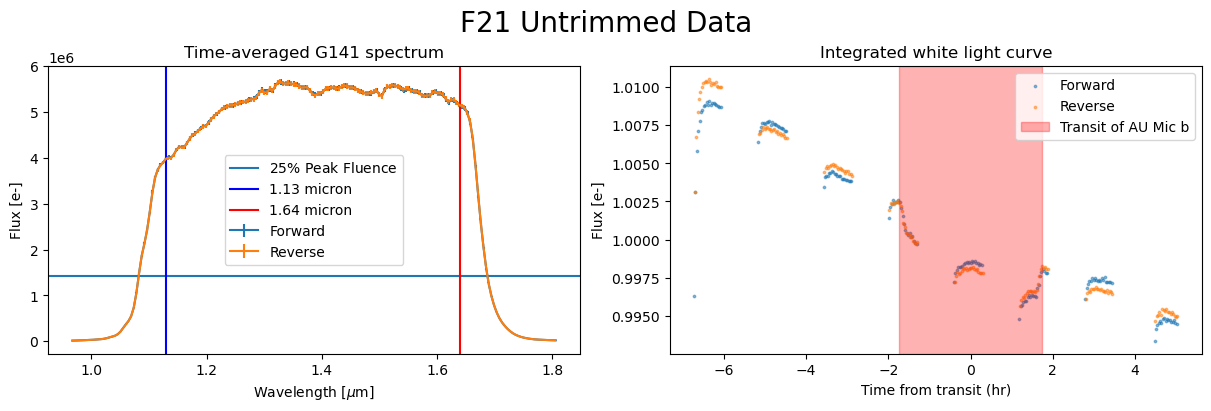

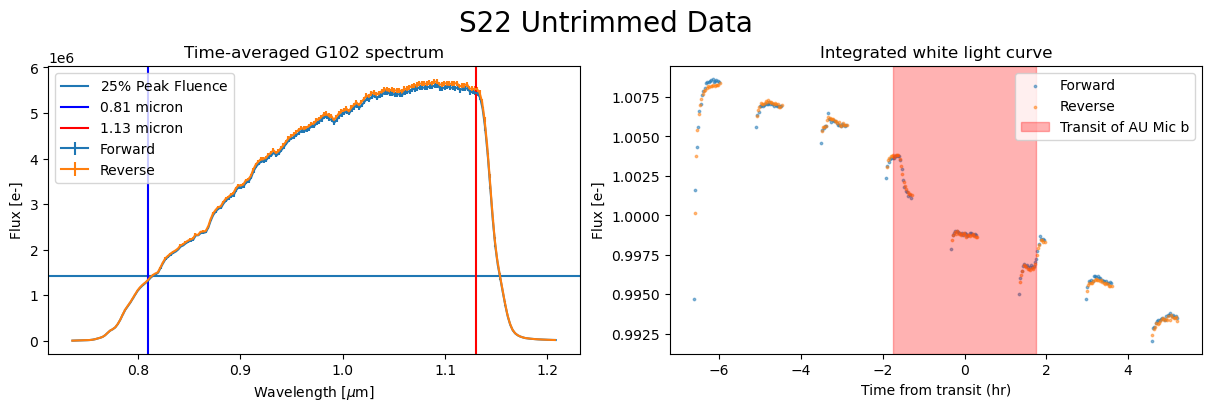

In [75]:
for visit in ['F21','S22']:
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

    for direction in ['Forward','Reverse']:
        print(visit,direction)
        print('')

        'Read in the data from the previous step'
        aligned_rainbow = read_rainbow(f'../data/{visit}_{direction}_aligned_pacman_spec.rainbow.npy')

        'Calculate the average spectrum'
        average_spec = aligned_rainbow.get_average_spectrum()
        average_spec_err = 0.01*average_spec

        visit_data = visits[f'{visit}']        
        grism = visit_data['Grism']
        t0 = visit_data['T0 (BJD_TDB)']
        if visit =='F21':
            wave_lower = 1.13*u.micron # blue-end cutoff for trimming
            wave_upper = 1.64*u.micron # red-end cutoff for trimming
        if visit =='S22':
            wave_lower = 0.81*u.micron # blue-end cutoff for trimming
            wave_upper = 1.13*u.micron # red-end cutoff for trimming
        
        'Calculate the white light curve'
        white_light_curve = np.nansum(aligned_rainbow.flux, axis=0)
        white_light_curve_err = 100e-6*white_light_curve

        'Calculate the average spectrum'
        average_spec = aligned_rainbow.get_average_spectrum()
        average_spec_err = np.abs(0.01*average_spec)
        
        'Plot'
        ax1.errorbar(aligned_rainbow.wavelength, average_spec, yerr=average_spec_err,label=f'{direction}')
        ax2.scatter((aligned_rainbow.time.value-t0.value)*24, white_light_curve/np.nanmean(white_light_curve[22:]), s=3,alpha=0.5, label=f'{direction}')

    ax1.axhline(0.25*np.nanmax(average_spec.value),label=r'25$\%$ Peak Fluence')
    ax1.axvline(wave_lower.value,label=f'{wave_lower.value} micron',color='blue')
    ax1.axvline(wave_upper.value,label=f'{wave_upper.value} micron',color='red')
    ax1.legend()
    ax1.set_title(f'Time-averaged {grism} spectrum')
    ax1.set_xlabel(r'Wavelength [$\mu$m]')
    ax1.set_ylabel('Flux [e-]')
    
    ax2.axvspan(-1.75, 1.75, alpha=0.3,color='r',label='Transit of AU Mic b')
    # ax2.axvspan((first_orbit_start.value-t0.value)*24, (first_orbit_end.value-t0.value)*24,label=f'First Orbit',alpha=0.3,zorder=-100,color='gray',linestyle='')
    ax2.legend()
    ax2.set_title(f'Integrated white light curve')
    ax2.set_xlabel(r'Time from transit (hr)')
    ax2.set_ylabel('Flux [e-]')
    
    plt.suptitle(f'{visit} Untrimmed Data',size=20)
    plt.savefig(f"../figs/{visit}_untrimmed_data.png")

F21 Forward



  0%|          | 0/110 [00:00<?, ?it/s]

F21 Reverse



  0%|          | 0/110 [00:00<?, ?it/s]

S22 Forward



  0%|          | 0/130 [00:00<?, ?it/s]

S22 Reverse



  0%|          | 0/130 [00:00<?, ?it/s]

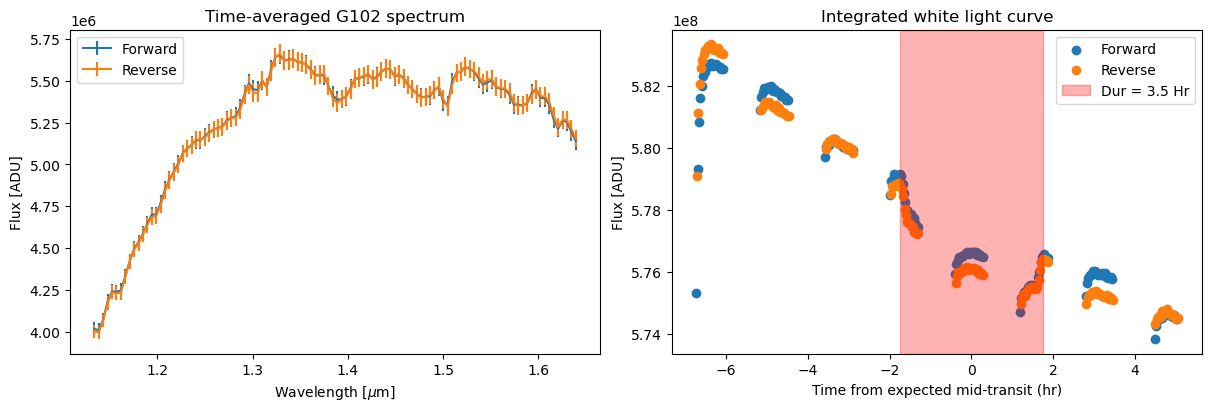

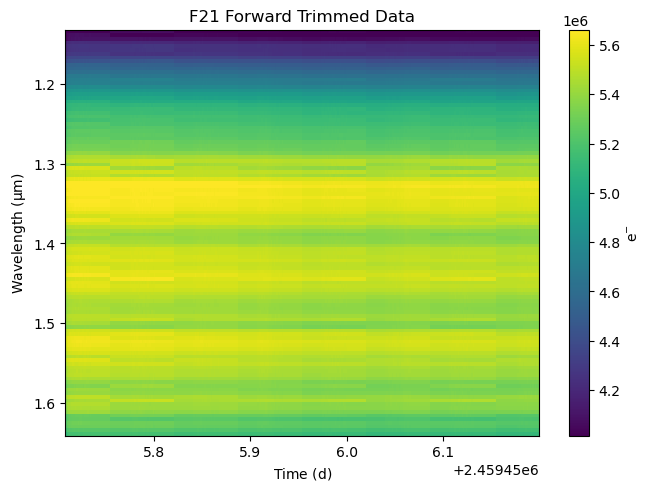

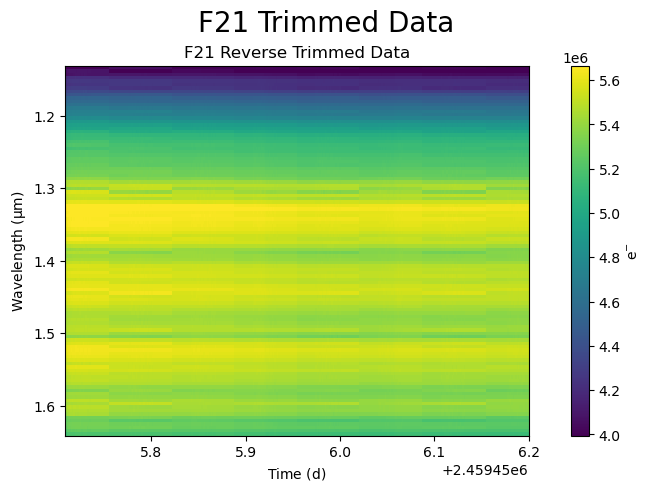

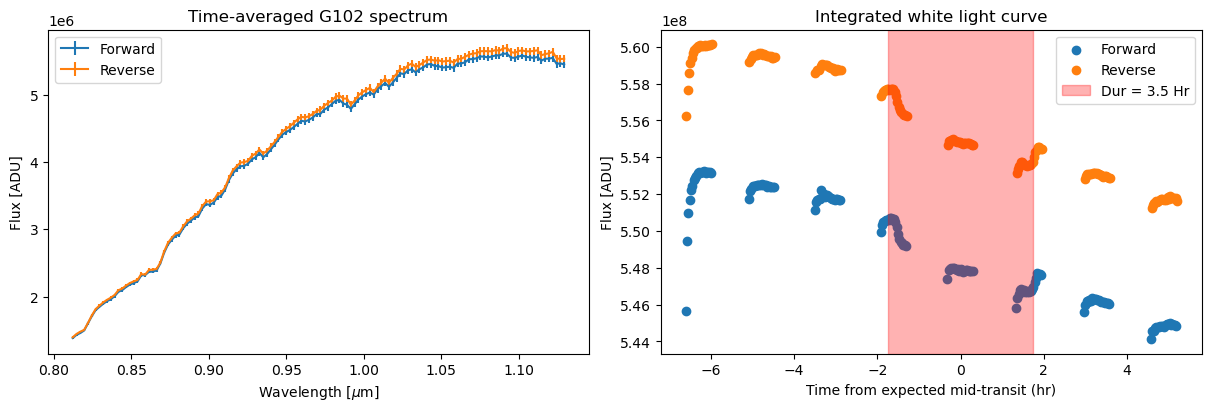

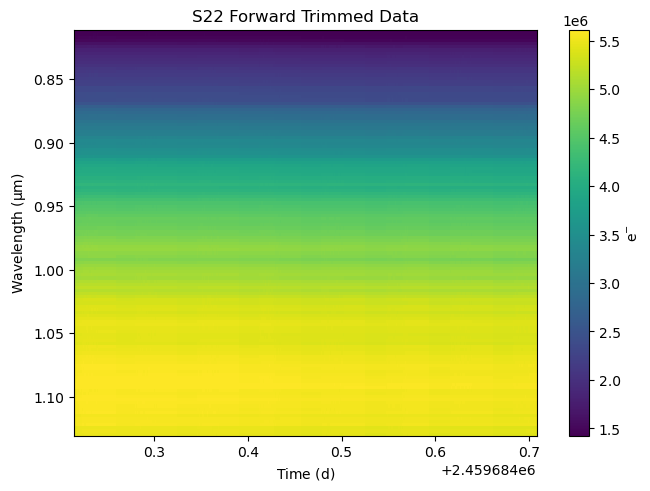

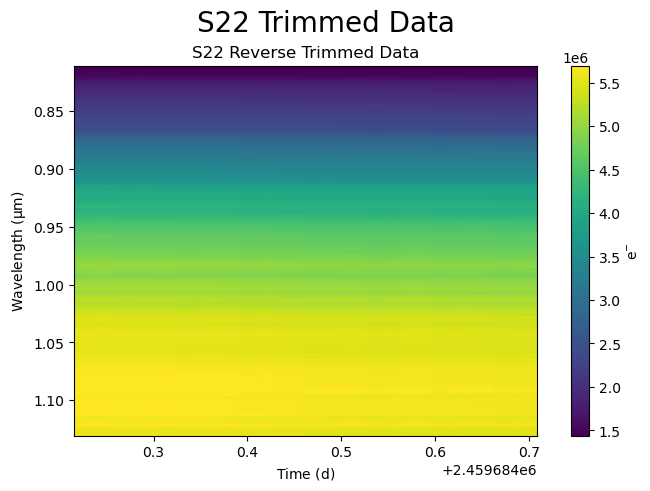

In [76]:
for visit in ['F21','S22']:
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

    for direction in ['Forward','Reverse']:
        print(visit,direction)
        print('')
        
        'Load data tables'
        visit_data = visits[f'{visit}']        
        t0 = visit_data['T0 (BJD_TDB)']
        if visit =='F21':
            wave_lower = 1.13*u.micron # blue-end cutoff for trimming
            wave_upper = 1.64*u.micron # red-end cutoff for trimming
        if visit =='S22':
            wave_lower = 0.81*u.micron # blue-end cutoff for trimming
            wave_upper = 1.13*u.micron # red-end cutoff for trimming
            
        aligned_rainbow = read_rainbow(f'../data/{visit}_{direction}_aligned_pacman_spec.rainbow.npy')
        wavelength = aligned_rainbow.wavelength
        if direction == 'Forward':
            ref_wavelength = wavelength
        if direction == 'Reverse':
            for i in range(len(aligned_rainbow.time.value)):
                aligned_rainbow.flux.value[:,i] = bintogrid(x=aligned_rainbow.wavelength.value, y=aligned_rainbow.flux.value[:,i], newx=ref_wavelength.value)['y']
                aligned_rainbow.wavelength = ref_wavelength
        wavelength = ref_wavelength
        
        'Trim the bad wavelengths from the wavelength and flux arrays'
        a = (wave_upper >= wavelength)
        b = (wavelength >= wave_lower)
        ok_wavelengths = (a == b) # trim the edges of each spectrum, where no flux is detected
        wave = wavelength[ok_wavelengths]    
        _flux = aligned_rainbow.flux[ok_wavelengths,:]
        unc = aligned_rainbow.uncertainty[ok_wavelengths, :]
        time = aligned_rainbow.time
        # print(time)

        'Turn the wavelength-trimmed data into a Rainbow object and save to a file to use later'
        trimmed = Rainbow(wavelength=wave, time=aligned_rainbow.time, flux=_flux, uncertainty=unc)
        trimmed.save(f"../data/{visit}_{direction}_trimmed_pacman_spec.rainbow.npy")

        # trimmed.imshow()
        'Calculate the white light curve'
        white_light_curve = np.nansum(trimmed.flux,axis=0)
        'Calculate the average spectrum'
        average_spec = trimmed.get_average_spectrum()
        average_spec_err = 0.01*average_spec #up to debate how to calculate this
        
        ''' Plot  '''
        ax1.errorbar(trimmed.wavelength, average_spec, yerr=average_spec_err,label=f'{direction}')
        ax2.scatter((time-t0)*24, white_light_curve, label=f'{direction}')

        plt.figure()
        trimmed.imshow()
        plt.title(f'{visit} {direction} Trimmed Data')
        plt.savefig(f"../figs/{visit}_{direction}_trimmed_imshow.png")
    
        # plt.figure()
        # trimmed.plot()

    ax1.legend()
    ax1.set_title(f'Time-averaged {grism} spectrum')
    ax1.set_xlabel(r'Wavelength [$\mu$m]')
    ax1.set_ylabel('Flux [ADU]')
    
    ax2.axvspan(-1.75, 1.75, alpha=0.3,color='r',label='Dur = 3.5 Hr')
    ax2.legend()
    ax2.set_title(f'Integrated white light curve')
    ax2.set_xlabel(r'Time from expected mid-transit (hr)')
    ax2.set_ylabel('Flux [ADU]')
    
    plt.suptitle(f'{visit} Trimmed Data',size=20)
    plt.savefig(f"../figs/{visit}_processed_data.png")

In [8]:
hires_wavelength = np.linspace(0.7, 2.0, 10000)
grid = get_interp_stellar_spectrum(hires_wavelength)

In [ ]:
# Calculate a BT SETTL model
amb_flux = grid(float(4000)) # this is in erg/cm^s/s/Angstrom
cool_flux = grid(float(3100))
model_wave = hires_wavelength[:-1]
model_flux = 0.4*cool_flux + 0.6*amb_flux

In [ ]:
amb_flux = get_phoenix_photons(wavelength = hires_wavelength*u.micron, temperature=4000, metallicity=0.12, logg=4.52, R=1000)
cool_flux = get_phoenix_photons(wavelength = hires_wavelength*u.micron, temperature=3100, metallicity=0.12, logg=4.52, R=1000)

model_flux = 0.4*cool_flux[1] + 0.6*amb_flux[1]
model_wave = hires_wavelength

In [35]:
# Function to apply the best shift and stretch to all non-continuum-normalized spectra
def apply_shift_and_stretch_to_raw_spectra(W2, F2_time_resolved, best_shift, best_stretch):
    """Apply the best shift and stretch to each time-resolved spectrum (not continuum-normalized)."""
    # Apply stretch and shift to the W2 wavelength grid
    W2_transformed = W2 * best_stretch + best_shift
    
    # Adjust the entire wavelength grid (same shift and stretch for all time-resolved spectra)
    F2_transformed_time_resolved = []
    for i in range(F2_time_resolved.shape[1]):  # Loop over each time (i.e., column in F2_time_resolved)
        F2_spectrum = F2_time_resolved[:, i]  # Get the i-th time-resolved spectrum
        F2_transformed_time_resolved.append(F2_spectrum)  # Append without changing flux, only wavelength adjusted
    
    return W2_transformed, np.array(F2_transformed_time_resolved).T  # Return time-resolved spectra (same shape)

for visit in ['F21','S22']:
    for direction in ['Forward','Backward']:
        print(visit, direction)
        print('')
        
        # Load data tables
        visit_data = visits[f'{visit}']        
        t0 = visit_data['T0 (BJD_TDB)']

        # Read in the data from the previous step
        aligned_rainbow = read_rainbow(f"../data/{visit}_{direction}_trimmed_pacman_spec.rainbow.npy")
        # sigma = visits[f'{visit}']['filter_sigma']
        sigma = 4
        w = aligned_rainbow.wavelength

        # Calculate an average spectrum
        average_spec = aligned_rainbow.get_average_spectrum()

        # Continuum normalize the average spectrum
        contin_normed_data = continuum_correction(w, average_spec)
        
        # Convolve and interpolate the model spectrum
        convolved = convolve_spectrum(model_wave, model_flux, sigma=sigma, method='astropy', kernel_type='astropy')
        filter_response = visits[f'{visit}']['filter_response']
        resampled_filter_response = bintogrid(filter_response.wave[0].value, filter_response.throughput[0], newx=w.value)
        resampled_model = bintogrid(model_wave, convolved, newx=w.value)
        model = resampled_model['y'] * resampled_filter_response['y']
        contin_normed_model = continuum_correction(w, model)

        # W1, F1 = wavelength and flux for reference spectrum (continuum-normalized model)
        # W2, F2 = wavelength and flux for data spectrum (continuum-normalized observed)
        
        W1 = w.value
        F1 = contin_normed_model
        W2 = w.value
        F2 = contin_normed_data
        
        # Perform the sliding and stretching alignment using the average spectra
        best_shift, best_stretch, best_W2_transformed, best_F2_shifted = slide_and_stretch_match(W1, F1, W2, F2, max_shift, step_shift, stretch_range, step_stretch)
        print(best_shift)
        print(best_stretch)

        # Apply the shift and stretch to the original, non-continuum-normalized spectra
        W2_transformed, F2_transformed = apply_shift_and_stretch_to_raw_spectra(w.value, aligned_rainbow.flux, best_shift, best_stretch)
        
        # Update the wavelength and flux of the non-continuum-normalized spectra
        calibrated_rainbow = aligned_rainbow
        calibrated_rainbow.wavelength = W2_transformed*u.micron
        # calibrated_rainbow.flux = F2_transformed
        # calibrated_rainbow.uncertainty = np.sqrt(F2_transformed)
            
        # Save the calibrated rainbow object
        calibrated_rainbow.save(f"../data/{visit}_{direction}_calibrated.rainbow.npy")
        plt.figure()
        aligned_rainbow.imshow()
        plt.title('aligned')

        plt.figure()
        calibrated_rainbow.imshow()
        plt.title('calibrated')

        plt.figure()
        aligned_rainbow.normalize().imshow()
        plt.title('normalized')

        # Plot the comparison of original and transformed spectra
        plt.figure()
        plt.plot(W1, F1, label='reference (continuum-normalized model)')
        plt.plot(W2, F2, label='original (continuum-normalized observed)')
        plt.plot(calibrated_rainbow.wavelength, continuum_correction(calibrated_rainbow.wavelength, calibrated_rainbow.get_average_spectrum() ), label='transformed (continuum-normalized)')
        plt.legend()
        plt.show()

F21 Forward



  0%|          | 0/106 [00:00<?, ?it/s]

NameError: name 'continuum_correction' is not defined